In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y = True)

In [22]:
len(X)

178

In [23]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [24]:
pd.DataFrame(y)[0].value_counts()

1    71
0    59
2    48
Name: 0, dtype: int64

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Printing the decision tree

In [15]:
import matplotlib.pyplot as plt

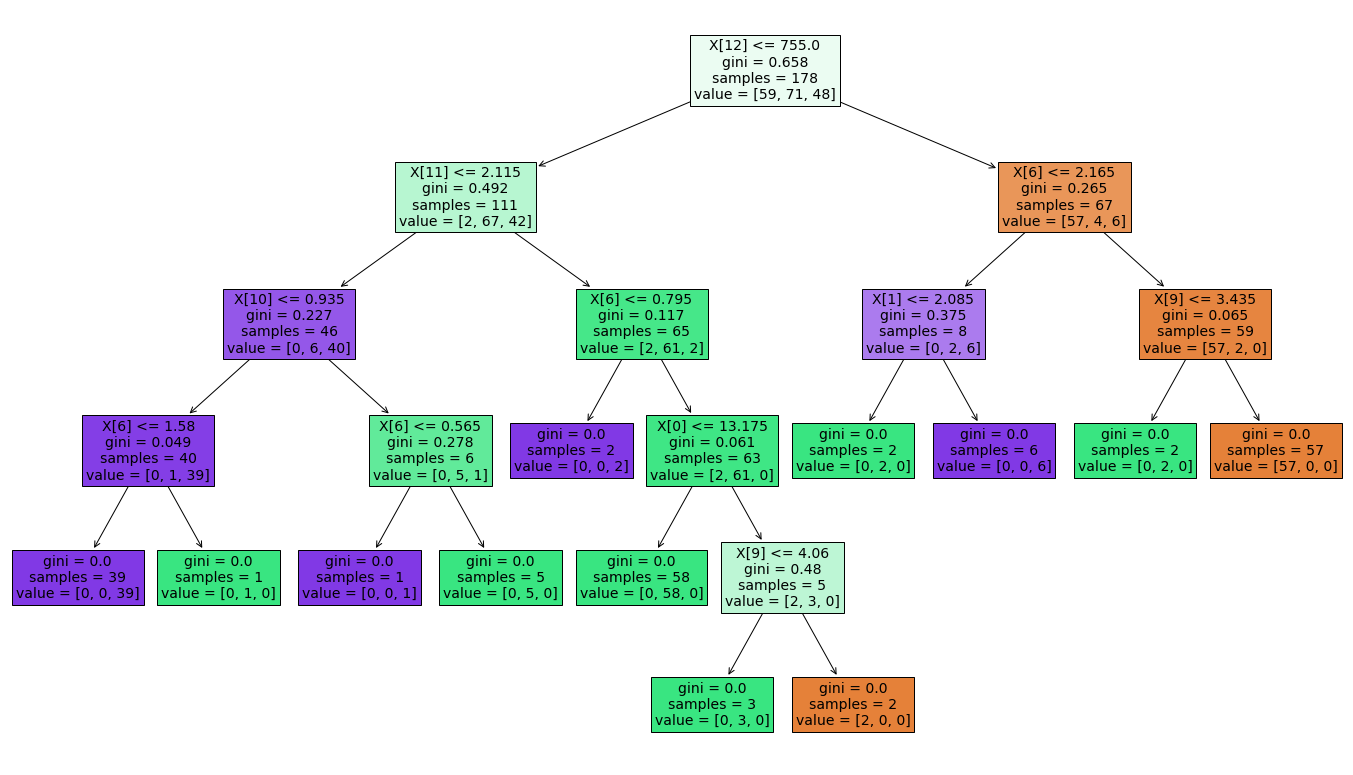

In [19]:
plt.figure(figsize = (24,14))

tree.plot_tree(clf, fontsize=14, filled = True)
plt.show()

## Hyperparameters

#### 1. min_impurity_decrease

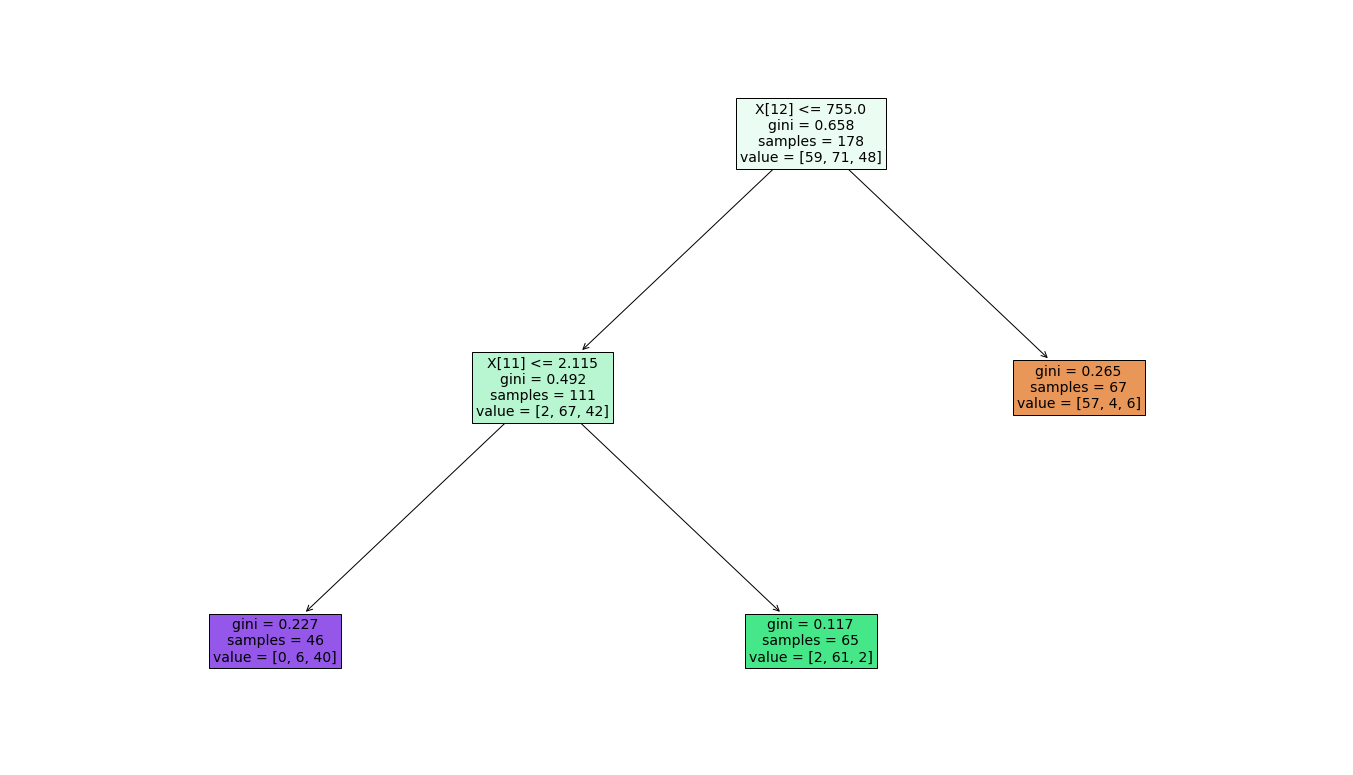

In [26]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease = 0.2)
clf.fit(X,y)
plt.figure(figsize = (24,14))
tree.plot_tree(clf, fontsize=14, filled = True)
plt.show()

#### 2. mAx_depth

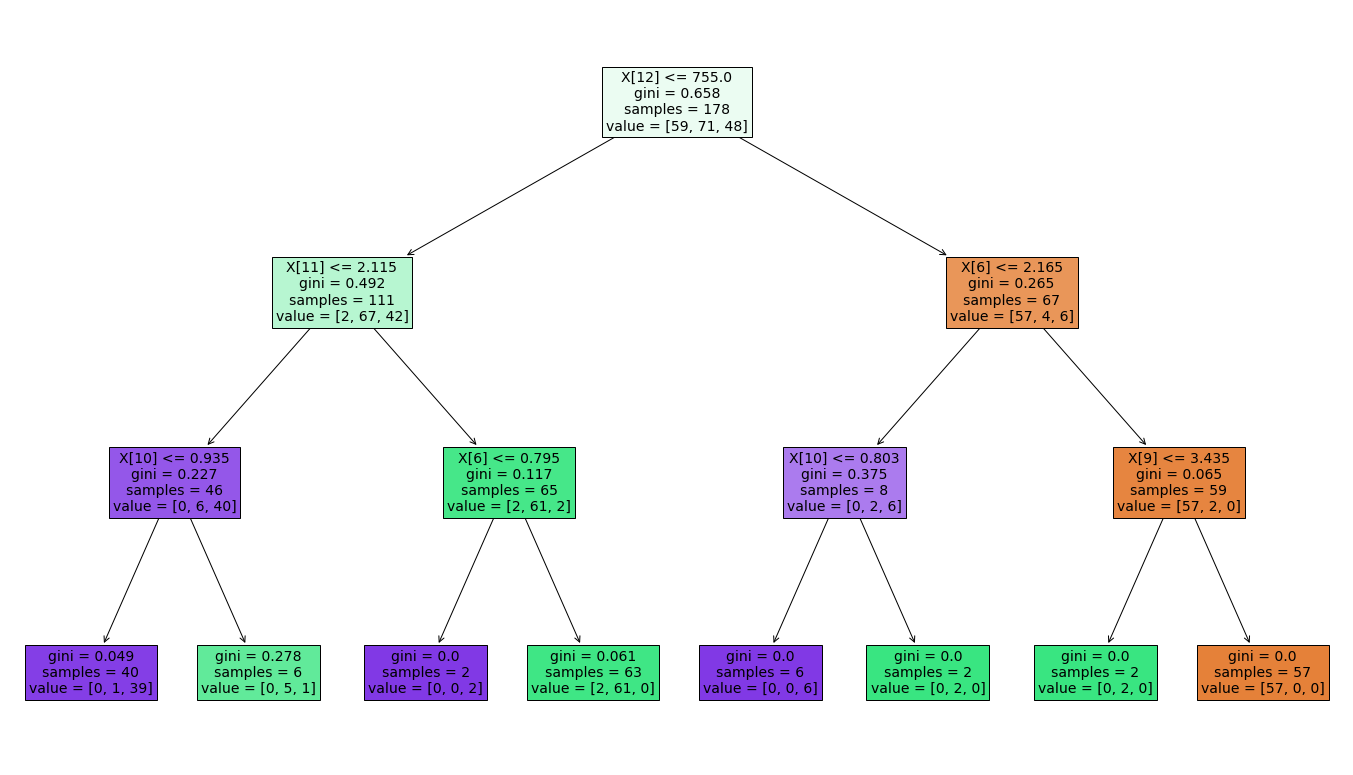

In [28]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)
plt.figure(figsize = (24,14))
tree.plot_tree(clf, fontsize=14, filled = True)
plt.show()

#### 3. min_samples_leaf

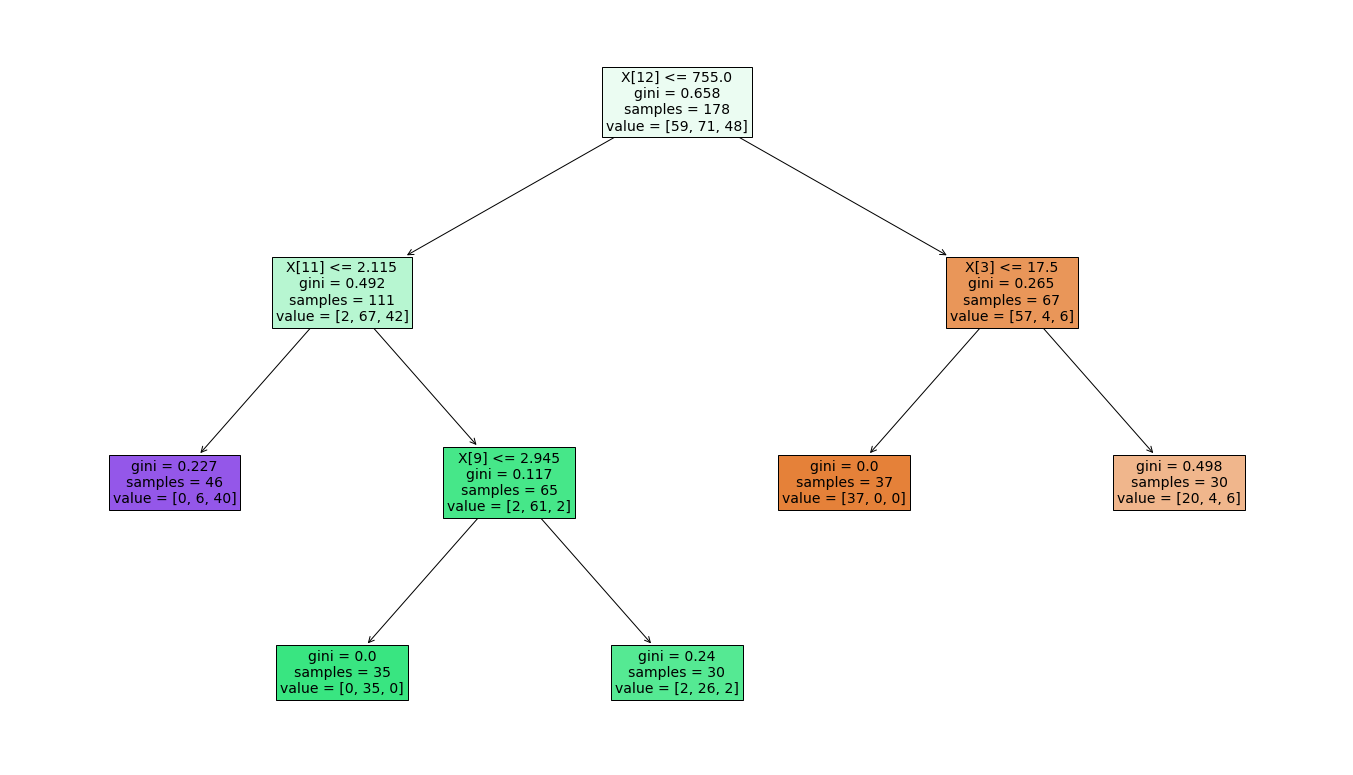

In [32]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 30)
clf.fit(X,y)
plt.figure(figsize = (24,14))
tree.plot_tree(clf, fontsize=14, filled = True)
plt.show()

#### 4. max_leaf_nodes

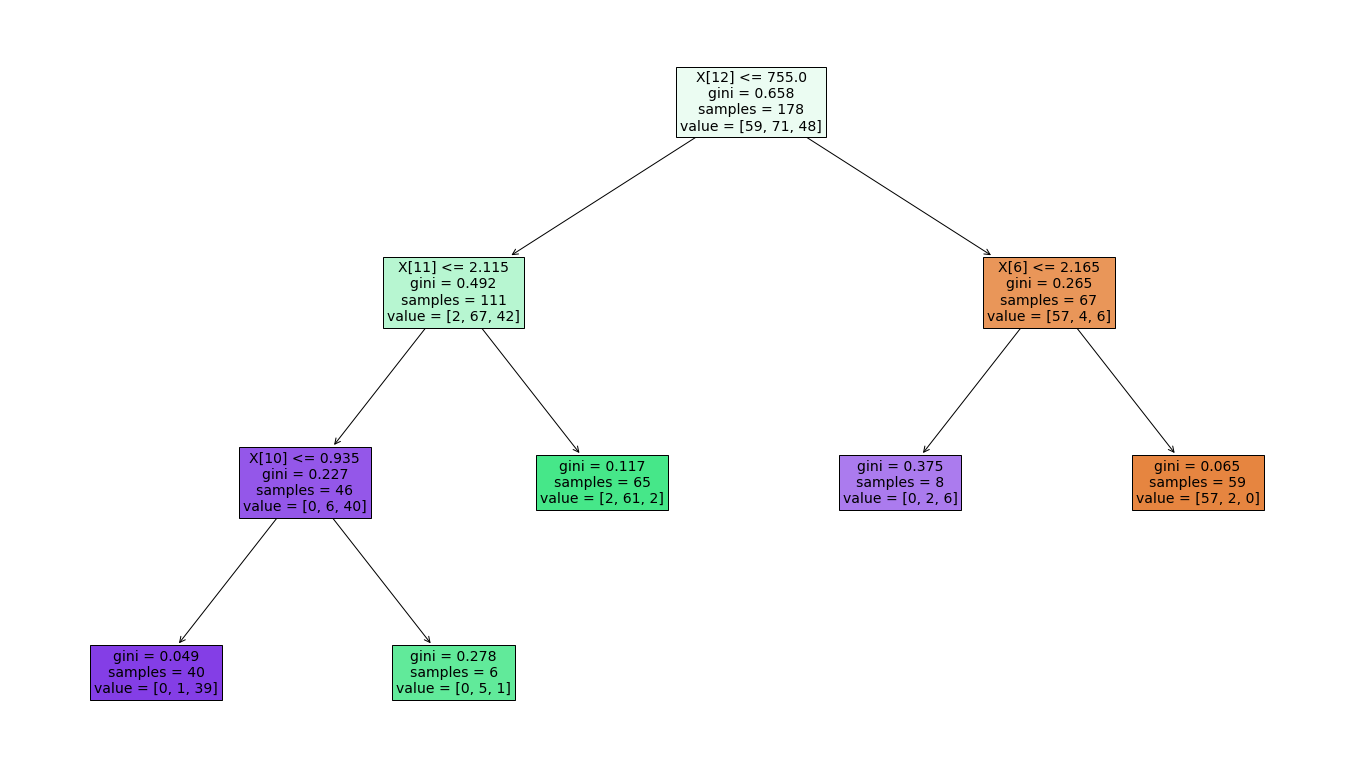

In [33]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
clf.fit(X,y)
plt.figure(figsize = (24,14))
tree.plot_tree(clf, fontsize=14, filled = True)
plt.show()

## Decision Tree Use Case

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/HR.csv")

In [37]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [38]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [41]:
#renaming the sales column
df = df.rename(columns = {'sales':'department'})

In [42]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [43]:
df['department'] = np.where(df['department'] == 'support','technical',df['department'])
df['department'] = np.where(df['department'] == 'IT','technical',df['department'])

In [44]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

### Create dummy variables for categorical columns

In [46]:
cat_vars = ['department','salary']

for var in cat_vars:
    cat_list = pd.get_dummies(df[var],prefix=var)    
    df1 = df.join(cat_list)
    df = df1

In [48]:
df.shape

(14999, 21)

In [49]:
df.drop(columns = ['department','salary'],inplace=True)
df.shape

(14999, 19)

In [56]:
y = df['left']
X = df.drop(columns = ['left'])

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [64]:
rfe = RFE(model,10)
rfe = rfe.fit(X,y)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
print(rfe.ranking_)

[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [61]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [62]:
cols = []
for i in range(len(X.columns)):
    if rfe.ranking_[i] == 1:
        cols.append(X.columns[i])

In [67]:
#Top 10 features
cols

['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'salary_high',
 'salary_low']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
print(metrics.classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      3462
           1       0.60      0.39      0.47      1038

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [72]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.97      0.96      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
param_grid = {"max_depth" : [3,4,5],
             "min_samples_leaf" : [5,15,20,25],
             "criterion" : ["gini","entropy"]
             }

clf = tree.DecisionTreeClassifier()

tree_rand = RandomizedSearchCV(clf, param_grid, cv=5, n_iter = 15)

tree_rand.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [78]:
#Print the best parameters
print("Tuned decision tree parameters : {}".format(tree_rand.best_params_))
print("The best score is {}".format(tree_rand.best_score_))

Tuned decision tree parameters : {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
The best score is 0.972197754807158
